In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
circuits = pd.read_csv("data-raw/circuits.csv")
results = pd.read_csv("data-raw/results.csv")
races = pd.read_csv("data-raw/races.csv")
drivers = pd.read_csv("data-raw/drivers.csv")

Q1: Are certain circuits or regions (e.g., Europe vs Asia) more favorable for Hamilton’s performance?

In [4]:
#Get Hamilton's driverId
hamilton_driver = drivers[drivers["surname"] == "Hamilton"]
hamilton_id = hamilton_driver["driverId"].values[0]
hamilton_results = results[results["driverId"] == hamilton_id]

hamilton_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25744,25750,1092,1,131,44,6,5,5,5,10.0,28,+40.326,10944330,11,7,1:45.530,198.097,1
25761,25767,1093,1,131,44,3,2,2,2,18.0,56,+5.023,6136710,45,5,1:39.830,198.805,1
25781,25787,1094,1,131,44,3,2,2,2,18.0,71,+15.186,5931915,32,5,1:22.062,188.813,1
25801,25807,1095,1,131,44,2,2,2,2,18.0,71,+1.529,5915573,63,2,1:13.942,209.791,1


In [5]:
#Merge datasets
hamilton_race_results = hamilton_results.merge(races, on="raceId")
hamilton_circuit_results = hamilton_race_results.merge(circuits, on="circuitId")

hamilton_circuit_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,25750,1092,1,131,44,6,5,5,5,10.0,...,\N,\N,suzuka,Suzuka Circuit,Suzuka,Japan,34.84310,136.54100,45,http://en.wikipedia.org/wiki/Suzuka_Circuit
306,25767,1093,1,131,44,3,2,2,2,18.0,...,\N,\N,americas,Circuit of the Americas,Austin,USA,30.13280,-97.64110,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...
307,25787,1094,1,131,44,3,2,2,2,18.0,...,\N,\N,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.40420,-99.09070,2227,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_He...
308,25807,1095,1,131,44,2,2,2,2,18.0,...,2022-11-12,19:30:00,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.70360,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...


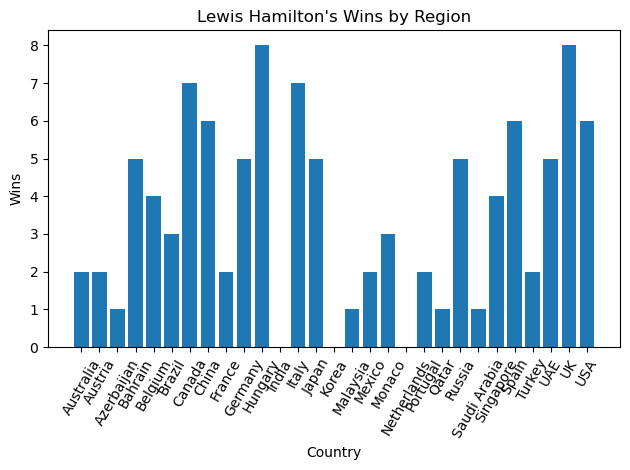

<Figure size 100000x600 with 0 Axes>

In [27]:
performance_by_region = hamilton_circuit_results.groupby("country").agg({
    "positionOrder": lambda x: (x == 1).sum(), 
    "points": "sum"  
}).reset_index()

plt.bar(performance_by_region["country"], performance_by_region["positionOrder"])
plt.xlabel("Country")
plt.ylabel("Wins")
plt.title("Lewis Hamilton's Wins by Region")
plt.xticks(rotation=60)
plt.tight_layout( )
plt.figure(figsize=(1000, 6)) 
plt.show()


Q2: Does Hamilton have higher win rates on specific track types (e.g., high-speed, street circuits)?

In [7]:
list_unique_ = pd.unique(hamilton_circuit_results["name_y"])
print(list_unique_)

['Albert Park Grand Prix Circuit' 'Sepang International Circuit'
 'Bahrain International Circuit' 'Circuit de Barcelona-Catalunya'
 'Istanbul Park' 'Circuit de Monaco' 'Circuit Gilles Villeneuve'
 'Circuit de Nevers Magny-Cours' 'Silverstone Circuit' 'Hockenheimring'
 'Hungaroring' 'Valencia Street Circuit' 'Circuit de Spa-Francorchamps'
 'Autodromo Nazionale di Monza' 'Marina Bay Street Circuit'
 'Fuji Speedway' 'Shanghai International Circuit'
 'Autódromo José Carlos Pace' 'Indianapolis Motor Speedway' 'Nürburgring'
 'Suzuka Circuit' 'Yas Marina Circuit' 'Korean International Circuit'
 'Buddh International Circuit' 'Circuit of the Americas' 'Red Bull Ring'
 'Sochi Autodrom' 'Autódromo Hermanos Rodríguez' 'Baku City Circuit'
 'Circuit Paul Ricard' 'Autodromo Internazionale del Mugello'
 'Autódromo Internacional do Algarve' 'Autodromo Enzo e Dino Ferrari'
 'Circuit Park Zandvoort' 'Losail International Circuit'
 'Jeddah Corniche Circuit' 'Miami International Autodrome']


In [ ]:
#STREET CIRCUIT 
#'Albert Park Grand Prix Circuit' = 1 
# 'Sepang International Circuit' = 0
# 'Bahrain International Circuit' = 0 
# 'Circuit de Barcelona-Catalunya' = 0
# 'Istanbul Park' = 0 
# 'Circuit de Monaco' = 1 
# 'Circuit Gilles Villeneuve' = 0 
# 'Circuit de Nevers Magny-Cours' = 0
# 'Silverstone Circuit' = 0 
# 'Hockenheimring' = 0 
#'Hungaroring' 0
#'Valencia Street Circuit' 1
# 'Circuit de Spa-Francorchamps' 0
#'Autodromo Nazionale di Monza' 0
# 'Marina Bay Street Circuit' 1
#'Fuji Speedway' 0
#'Shanghai International Circuit' 0
#'Autódromo José Carlos Pace' 0
#'Indianapolis Motor Speedway' 0
#'Nürburgring' 0
#'Suzuka Circuit' 0
#Yas Marina Circuit' 0
#'Korean International Circuit' 0
#'Buddh International Circuit' 0
#'Circuit of the Americas' 0
#'Red Bull Ring' 0
#'Sochi Autodrom' 0
#'Autódromo Hermanos Rodríguez' 0
#'Baku City Circuit' 1
#'Circuit Paul Ricard' 0
#'Autodromo Internazionale del Mugello' 0
#'Autódromo Internacional do Algarve' 0
#'Autodromo Enzo e Dino Ferrari' 0
#'Circuit Park Zandvoort' 0
#Losail International Circuit' 0
#'Jeddah Corniche Circuit' 1
#'Miami International Autodrome' 1

In [12]:
street_circuit_mapping = {
    'Albert Park Grand Prix Circuit': 1,
    'Sepang International Circuit': 0,
    'Bahrain International Circuit': 0,
    'Circuit de Barcelona-Catalunya': 0,
    'Istanbul Park': 0,
    'Circuit de Monaco': 1,
    'Circuit Gilles Villeneuve': 0,
    'Circuit de Nevers Magny-Cours': 0,
    'Silverstone Circuit': 0,
    'Hockenheimring': 0,
    'Hungaroring': 0,
    'Valencia Street Circuit': 1,
    'Circuit de Spa-Francorchamps': 0,
    'Autodromo Nazionale di Monza': 0,
    'Marina Bay Street Circuit': 1,
    'Fuji Speedway': 0,
    'Shanghai International Circuit': 0,
    'Autódromo José Carlos Pace': 0,
    'Indianapolis Motor Speedway': 0,
    'Nürburgring': 0,
    'Suzuka Circuit': 0,
    'Yas Marina Circuit': 0,
    'Korean International Circuit': 0,
    'Buddh International Circuit': 0,
    'Circuit of the Americas': 0,
    'Red Bull Ring': 0,
    'Sochi Autodrom': 0,
    'Autódromo Hermanos Rodríguez': 0,
    'Baku City Circuit': 1,
    'Circuit Paul Ricard': 0,
    'Autodromo Internazionale del Mugello': 0,
    'Autódromo Internacional do Algarve': 0,
    'Autodromo Enzo e Dino Ferrari': 0,
    'Circuit Park Zandvoort': 0,
    'Losail International Circuit': 0,
    'Jeddah Corniche Circuit': 1,
    'Miami International Autodrome': 1
}

hamilton_circuit_results['is_street_circuit'] = hamilton_circuit_results['name_y'].map(street_circuit_mapping)
print(hamilton_circuit_results[['name_y', 'is_street_circuit']])

                             name_y  is_street_circuit
0    Albert Park Grand Prix Circuit                  1
1      Sepang International Circuit                  0
2     Bahrain International Circuit                  0
3    Circuit de Barcelona-Catalunya                  0
4                     Istanbul Park                  0
..                              ...                ...
305                  Suzuka Circuit                  0
306         Circuit of the Americas                  0
307    Autódromo Hermanos Rodríguez                  0
308      Autódromo José Carlos Pace                  0
309              Yas Marina Circuit                  0

[310 rows x 2 columns]


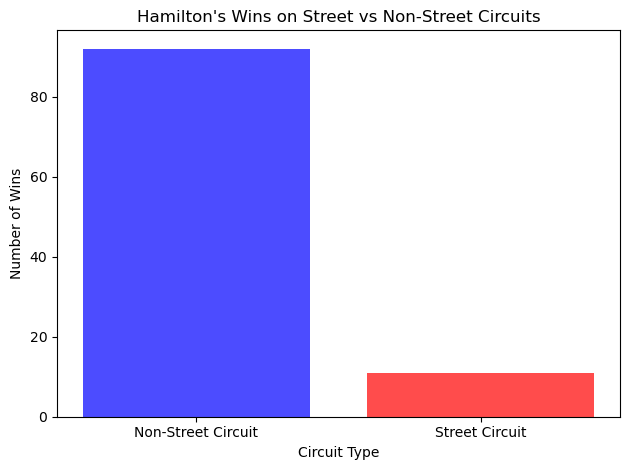

In [25]:
wins_by_circuit_type = hamilton_circuit_results.groupby('is_street_circuit')['positionOrder'].apply(lambda x: (x == 1).sum())

x_labels = ['Non-Street Circuit', 'Street Circuit']  
x_positions = range(len(wins_by_circuit_type))       
y_values = wins_by_circuit_type.values               

plt.bar(x_positions, y_values, color=['blue', 'red'], alpha=0.7)
plt.xticks(ticks=x_positions, labels=x_labels, rotation=0)

plt.title("Hamilton's Wins on Street vs Non-Street Circuits")
plt.ylabel("Number of Wins")
plt.xlabel("Circuit Type")
plt.tight_layout()

plt.show()


In [ ]:
#HIGH SPEED CIRCUIT
#Albert Park Grand Prix Circuit	0
#Sepang International Circuit	1
#Bahrain International Circuit	1
#Circuit de Barcelona-Catalunya	0
#Istanbul Park	1
#Circuit de Monaco	0
#Circuit Gilles Villeneuve	1
#Circuit de Nevers Magny-Cours	0
#Silverstone Circuit	1
#Hockenheimring	0
#Hungaroring	0
#Valencia Street Circuit	0
#Circuit de Spa-Francorchamps	1
#Autodromo Nazionale di Monza	1
#Marina Bay Street Circuit	0
#Fuji Speedway	1
#Shanghai International Circuit	1
#Autódromo José Carlos Pace	0
#Indianapolis Motor Speedway	1
#Nürburgring	0
#Suzuka Circuit	1
#Yas Marina Circuit	0
#Korean International Circuit	0
#Buddh International Circuit	1
#Circuit of the Americas	1
#Red Bull Ring	1
#Sochi Autodrom	0
#Autódromo Hermanos Rodríguez	1
#Baku City Circuit	0
#Circuit Paul Ricard	0
#Autodromo Internazionale del Mugello	1
#Autódromo Internacional do Algarve	1
#Autodromo Enzo e Dino Ferrari	0
#Circuit Park Zandvoort	0
#Losail International Circuit	1
#Jeddah Corniche Circuit	1
#Miami International Autodrome	0

In [13]:
high_speed_mapping = {
    'Albert Park Grand Prix Circuit': 0,
    'Sepang International Circuit': 1,
    'Bahrain International Circuit': 1,
    'Circuit de Barcelona-Catalunya': 0,
    'Istanbul Park': 1,
    'Circuit de Monaco': 0,
    'Circuit Gilles Villeneuve': 1,
    'Circuit de Nevers Magny-Cours': 0,
    'Silverstone Circuit': 1,
    'Hockenheimring': 0,
    'Hungaroring': 0,
    'Valencia Street Circuit': 0,
    'Circuit de Spa-Francorchamps': 1,
    'Autodromo Nazionale di Monza': 1,
    'Marina Bay Street Circuit': 0,
    'Fuji Speedway': 1,
    'Shanghai International Circuit': 1,
    'Autódromo José Carlos Pace': 0,
    'Indianapolis Motor Speedway': 1,
    'Nürburgring': 0,
    'Suzuka Circuit': 1,
    'Yas Marina Circuit': 0,
    'Korean International Circuit': 0,
    'Buddh International Circuit': 1,
    'Circuit of the Americas': 1,
    'Red Bull Ring': 1,
    'Sochi Autodrom': 0,
    'Autódromo Hermanos Rodríguez': 1,
    'Baku City Circuit': 0,
    'Circuit Paul Ricard': 0,
    'Autodromo Internazionale del Mugello': 1,
    'Autódromo Internacional do Algarve': 1,
    'Autodromo Enzo e Dino Ferrari': 0,
    'Circuit Park Zandvoort': 0,
    'Losail International Circuit': 1,
    'Jeddah Corniche Circuit': 1,
    'Miami International Autodrome': 0
}

hamilton_circuit_results['is_high_speed'] = hamilton_circuit_results['name_y'].map(high_speed_mapping)
print(hamilton_circuit_results[['name_y', 'is_high_speed']])

                             name_y  is_high_speed
0    Albert Park Grand Prix Circuit              0
1      Sepang International Circuit              1
2     Bahrain International Circuit              1
3    Circuit de Barcelona-Catalunya              0
4                     Istanbul Park              1
..                              ...            ...
305                  Suzuka Circuit              1
306         Circuit of the Americas              1
307    Autódromo Hermanos Rodríguez              1
308      Autódromo José Carlos Pace              0
309              Yas Marina Circuit              0

[310 rows x 2 columns]


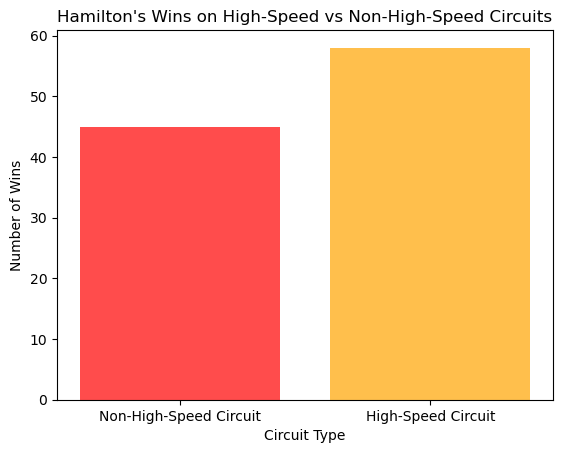

In [26]:
wins_by_speed_type = hamilton_circuit_results.groupby('is_high_speed')['positionOrder'].apply(lambda x: (x == 1).sum())

x_labels = ['Non-High-Speed Circuit', 'High-Speed Circuit']  
x_positions = range(len(wins_by_speed_type))                 
y_values = wins_by_speed_type.values                         

plt.bar(x_positions, y_values, color=['red', 'orange'], alpha=0.7)
plt.xticks(ticks=x_positions, labels=x_labels, rotation=0)

plt.title("Hamilton's Wins on High-Speed vs Non-High-Speed Circuits")
plt.ylabel("Number of Wins")
plt.xlabel("Circuit Type")

plt.show()
